In [2]:
import networkx as nx
import numpy as np
import scipy as sp
from scipy.sparse import rand
from itertools import combinations
from scipy.sparse import csr_matrix

np.random.seed(42)

def generate_adj_matrix(people_number, fill_factor = 0.5):
    fill_coeff = int(people_number * fill_factor)
    adj_matrix = sp.sparse.rand(people_number,
                                people_number,
                                density = fill_factor,
                                format = 'csr',
                                random_state = np.random.randint(1))

    adj_matrix = adj_matrix.todense()
    adj_matrix[np.arange(people_number), np.arange(people_number)] = 0
    adj_matrix = adj_matrix - adj_matrix.T
    adj_matrix[adj_matrix < 0] = 0
    
    return csr_matrix(adj_matrix)

/home/anastasia/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


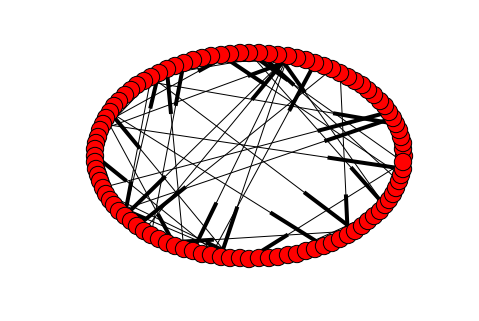

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline

G = nx.DiGraph(generate_adj_matrix(100, 0.005))

nx.draw_circular(G)

* Let $I$ be the set of players who still must pay money. 
* Let $J$ be the set of players who still must receive money.
* Let $d_i$ be a constant representing the amount of money player i must pay (where $i \in I$).
* Let $c_j$ be a constant representing the amount of money player j must receive (where $j \in J$).
* Let $x_{ij} \in [0, 1]$ be a decision variable representing the amount player i pays to player j. This is expressed in terms of the total fraction that player i owes.

As an example, if player 1 owes $10$, then $x_{12}=0.75$ would mean player $1$ pays player $2$ $7.50$.

* Let $y_{ij} \in {0, 1}$ represent whether player i made a transaction with player j (where $i \in I$ and $j \in J$). The variable takes on value 1 if a transaction was made and 0 otherwise.
* Objective is to minimize the total number of transactions:

\begin{equation*}
\begin{aligned}
& \underset{?}{\text{minimize}}
& & \sum_{i \in I, j \in J} y_{ij} \\
& s.t. 
& &  \sum_{j \in J} x_{ij} = 1 \ \forall i \in I \\
& & & \sum_{i \in I} a_i * x_{ij} = b_j \ \forall j \in J \\
& & & x_{ij} \leq y_{ij}
\end{aligned}
\end{equation*}

* First constraint is that each player who owes money pays exactly what they owe:
$$\sum_{j \in J} x_{ij} = 1 (\forall i \in I)$$
* Second constraint is that each player who must receive money gets the exact amount they're supposed to receive:
$$\sum_{i \in I} a_i * x_{ij} = b_j (\forall j \in J)$$
* Last constraint relates the x and y decision variables. That is, it defines what it means for a transaction to occur between i and j. A transaction occurs if and only if i pays some nonzero amount to j (i.e., $x_{ij} > 0$):
$$ x_{ij} > 0 --> y_{ij} = 1$$

To represent the above implication constraint, you can actually rewrite this as an inequality:
$$x_{ij} \leq y_{ij}$$

In [4]:
people_number = 5
adj_matrix = generate_adj_matrix(people_number, 0.5)

debtors = []
creditors = []
d = []
c = []

for i in range(people_number):
    row_sum = adj_matrix[i, :].sum()
    
    if row_sum >= 0:
        debtors.append(i)
        d.append(row_sum)
    else:
        creditors.append(i)
        c.append(row_sum)
        
nmb_debt = len(debtors)
nmb_cred = len(creditors)

In [ ]:
"""Mixed Integer Problem"""

X = cvx.Variable(nmb_debt, nmb_cred)
Y = cvx.Variable(nmb_debt, nmb_cred)


objective = cvx.Minimize(sum_entries(Y))

constraints = []

for i in range(nmb_debt):
    sum_entries(Y)


solution = cvx.Problem(objective, constraints)
solution.solve(solver='GUROBI')

opened_cities = list(np.array(cities)[np.array(X.value).astype(bool)[1:-1].ravel()])
print('Optimal value is: {0}'.format(solution.value))
print("Opened {0} cities: {1}".format(len(opened_cities), opened_cities))

index = [cities.index(city) for city in opened_cities]


year_profit = - open_cost * len(opened_cities)
for i in index:
    for j in index:
        year_profit += profit[i, j] 
print("\n Optimal value of year profit is: {0}".format(year_profit)) 


plt.imshow(mpimg.imread('TicketToRide.png'))
